In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ganja.plotting as plotting
from scipy import stats

import matplotlib
matplotlib.style.use('seaborn-poster')

Using TensorFlow backend.


In [2]:
#df00 = pd.read_hdf('log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid10.hd5')
#df01 = pd.read_hdf('log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_5k_10.hd5')

lx=[]
for x in range(18):
    try:
        lx += [pd.read_hdf('log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_50k_'+str(x)+'.hd5')]
    except: 
        pass
[df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13,df14,df15,df16] = lx

Opening log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_50k_0.hd5 in read-only mode
Opening log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_50k_1.hd5 in read-only mode
Opening log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_50k_2.hd5 in read-only mode
Opening log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_50k_3.hd5 in read-only mode
Opening log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_50k_4.hd5 in read-only mode
Opening log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_50k_5.hd5 in read-only mode
Opening log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_50k_6.hd5 in read-only mode
Opening log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_50k_7.hd5 in read-only mode
Opening log/rerun_unnorm__nt4_nob_l2_sm_wtot_gto

In [3]:
df0.columns

Index(['eta', 'npu', 'phi', 'pred_maja', 'pred_mina', 'pred_ptD', 'pred_ring0',
       'pred_ring1', 'pred_ring2', 'pred_ring3', 'pred_ring4', 'pred_tau1',
       'pred_tau2', 'pred_tau21', 'pred_tau3', 'pred_tau32', 'pred_total',
       'pt', 'reco_maja', 'reco_mina', 'reco_ptD', 'reco_ring0', 'reco_ring1',
       'reco_ring2', 'reco_ring3', 'reco_ring4', 'reco_tau1', 'reco_tau2',
       'reco_tau21', 'reco_tau3', 'reco_tau32', 'reco_total'],
      dtype='object')

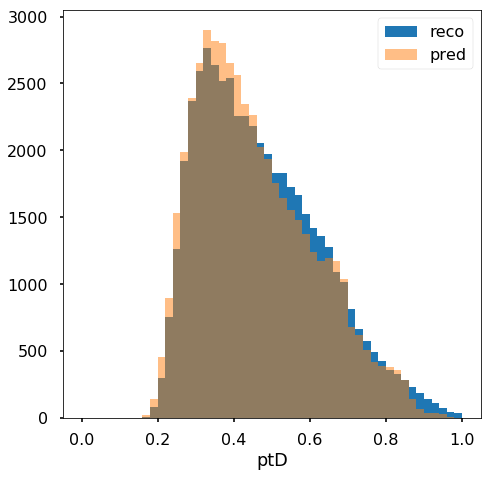

In [4]:
plotting.distrib_metric(df8['reco_ptD'],df8['pred_ptD'],xlabel="ptD",bins=50,range=[0,1])

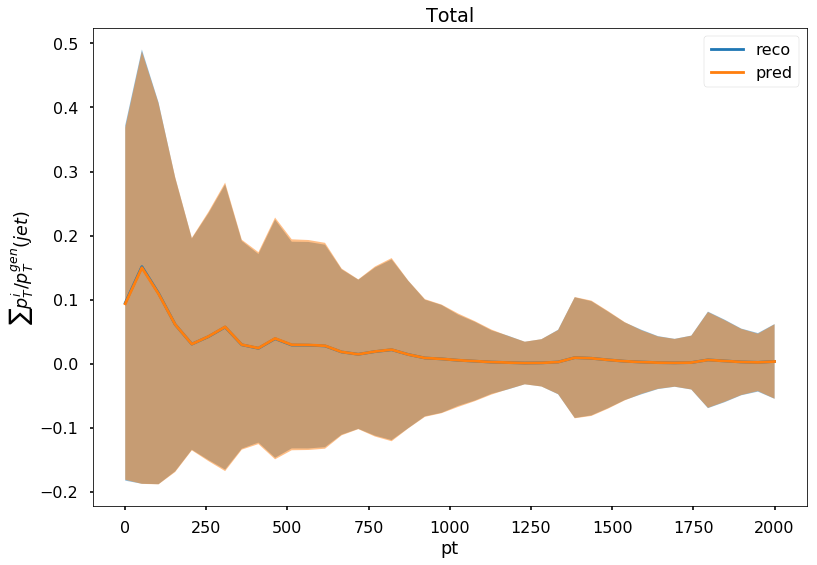

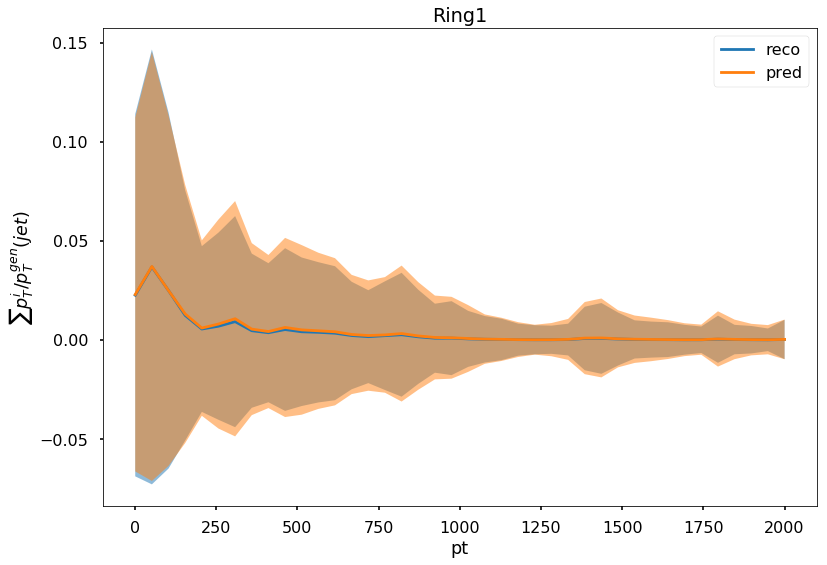

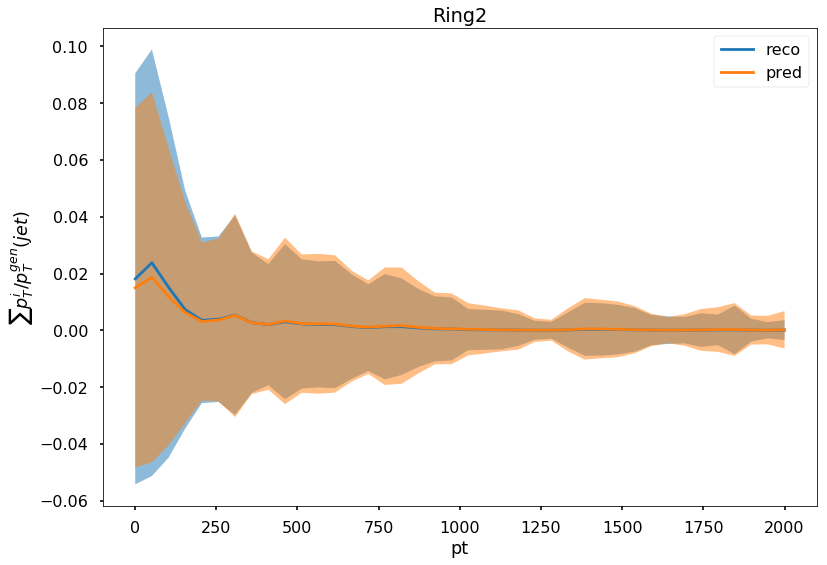

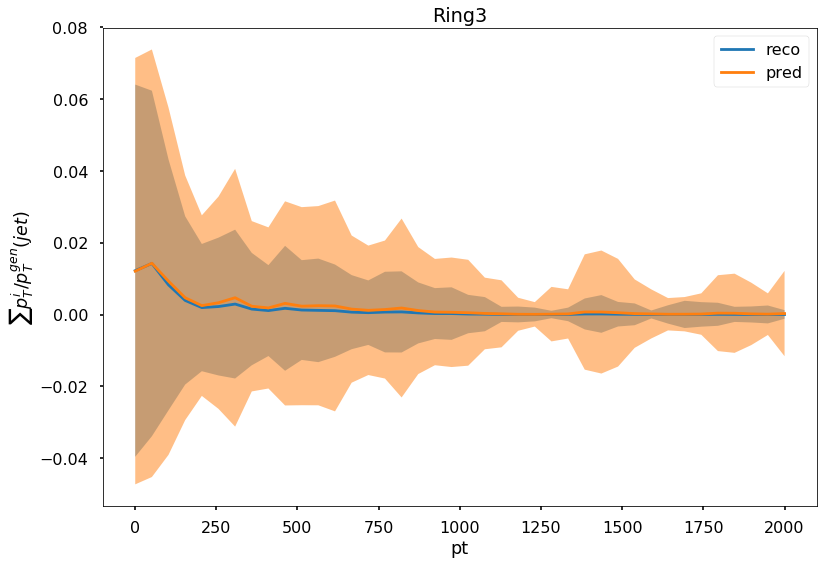

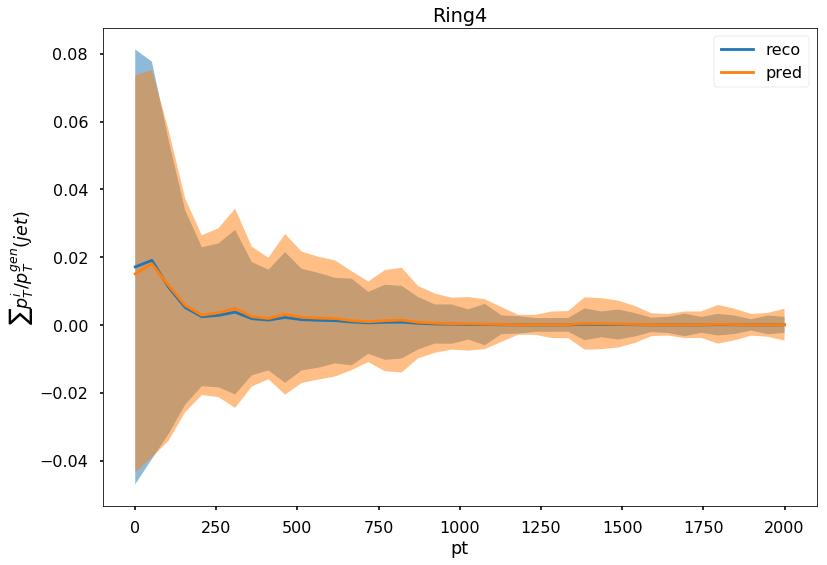

In [5]:
plotting.show_moments(df3['reco_total'].as_matrix(),df3['pred_total'].as_matrix(),df3['pt'],np.linspace(1,2000,40),xlabel='pt',title='Total')
plt.show()
plotting.show_moments(df3['reco_ring1'].as_matrix(),df3['pred_ring1'].as_matrix(),df3['pt'],np.linspace(1,2000,40),xlabel='pt',title='Ring1')
plt.show()
plotting.show_moments(df3['reco_ring2'].as_matrix(),df3['pred_ring2'].as_matrix(),df3['pt'],np.linspace(1,2000,40),xlabel='pt',title='Ring2')
plt.show()
plotting.show_moments(df3['reco_ring3'].as_matrix(),df3['pred_ring3'].as_matrix(),df3['pt'],np.linspace(1,2000,40),xlabel='pt',title='Ring3')
plt.show()
plotting.show_moments(df3['reco_ring4'].as_matrix(),df3['pred_ring4'].as_matrix(),df3['pt'],np.linspace(1,2000,40),xlabel='pt',title='Ring4')
plt.show()

In [6]:
#ks_tot = [stats.ks_2samp(x['reco_ptD'],x['pred_ptD'])[0] for x in lx]  #ks values at different epochs, whole ptD domain
pt= df0['pt']
dx = np.percentile(pt,np.linspace(0,100,6))   #decile pt values


def plot_ks(var):                          #plot ks value of a variable, for different epochs and pt bins
    for i in np.arange(1,len(dx)):         #decile loop
        upper, lower = dx[i], dx[i-1]
        ptD_r_ring = df0['reco_'+var][(pt<upper)&(pt>=lower)]
        ksx = [stats.ks_2samp(ptD_r_ring,x['pred_'+var][(pt>=lower)&(pt<upper)])[0] for x in lx]
        plt.plot(range(len(lx)),ksx,label=str(i-1)+'0 - '+str(i)+'0th percentile')
    

    plt.xlabel("Training Epochs")
    plt.title("Ks value of "+var+" distribution during training, by pt decile bins")
    plt.legend()
    plt.show()

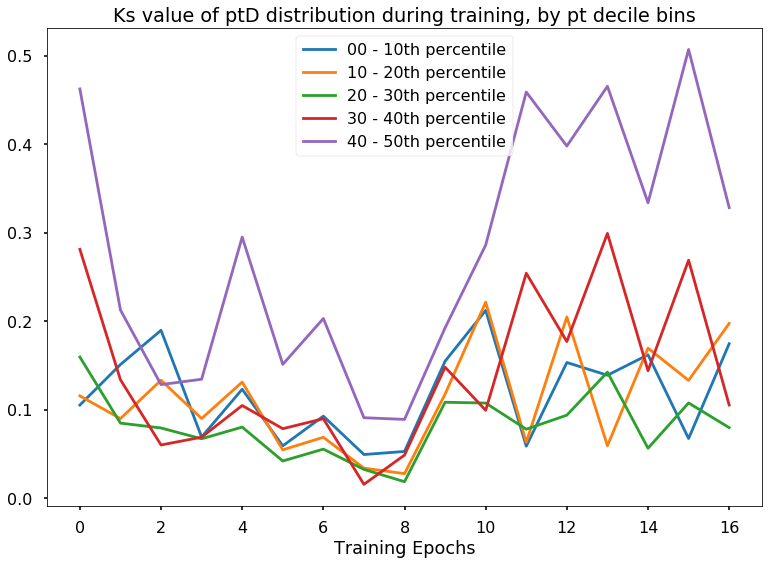

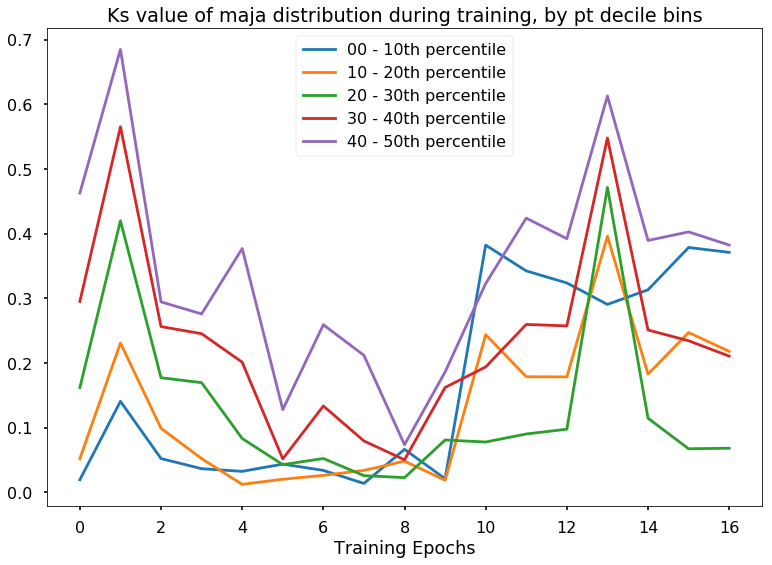

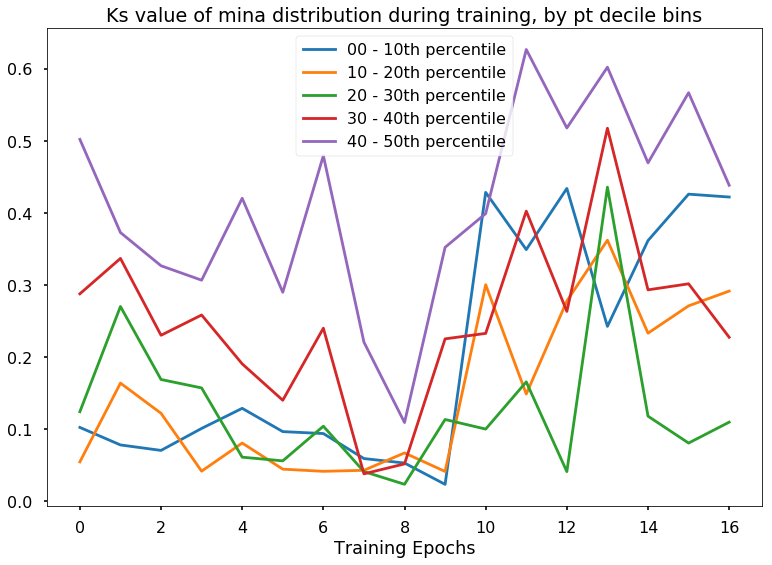

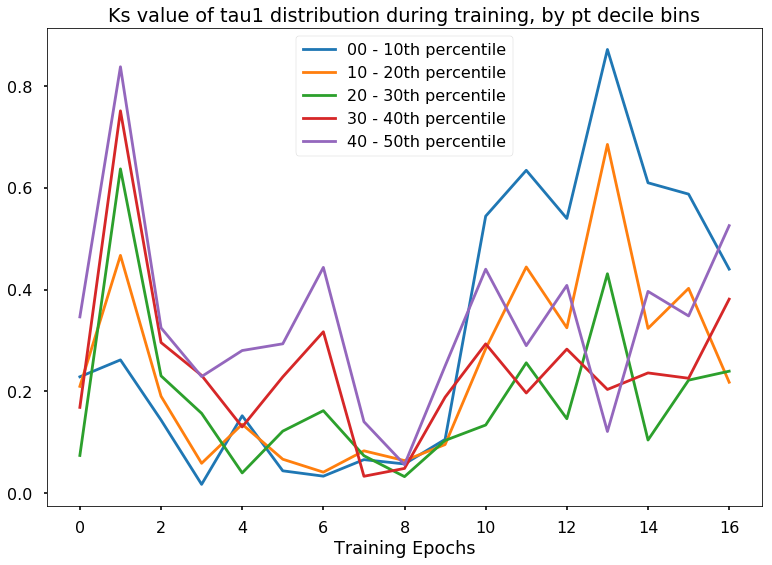

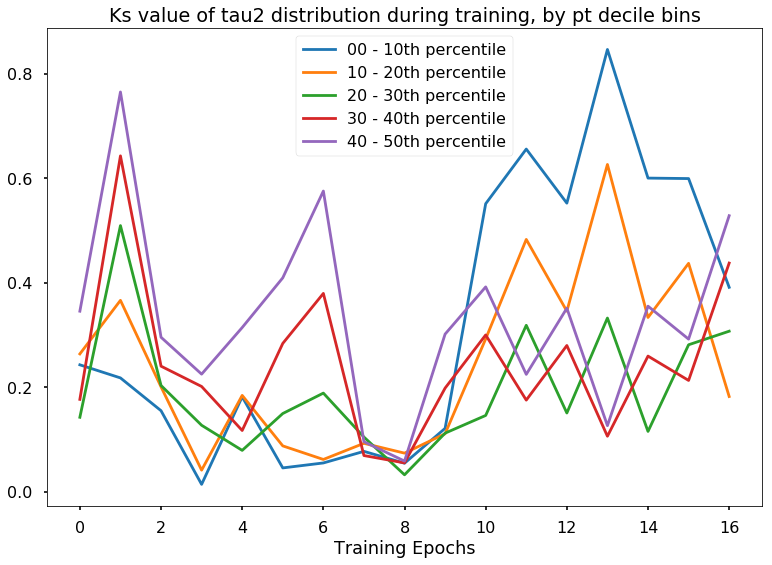

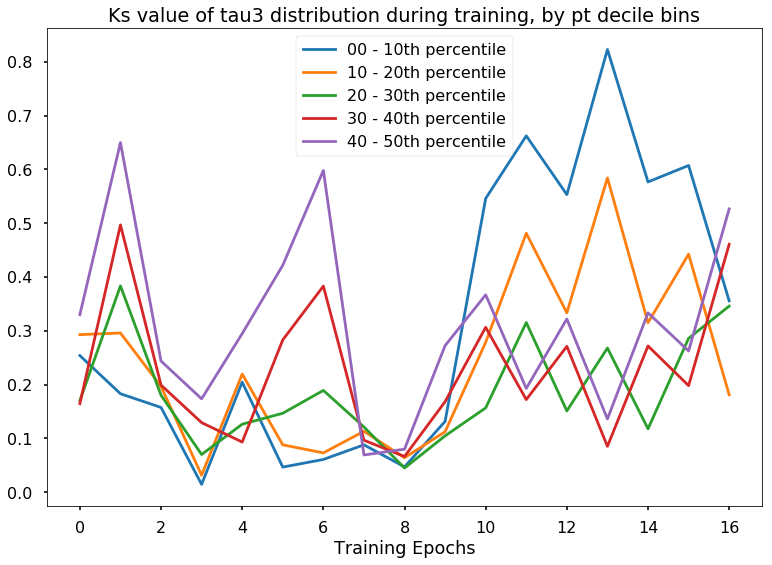

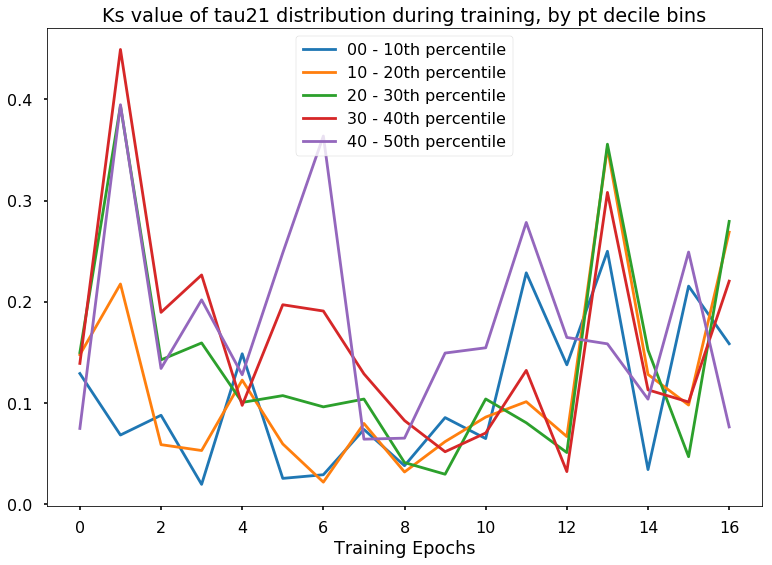

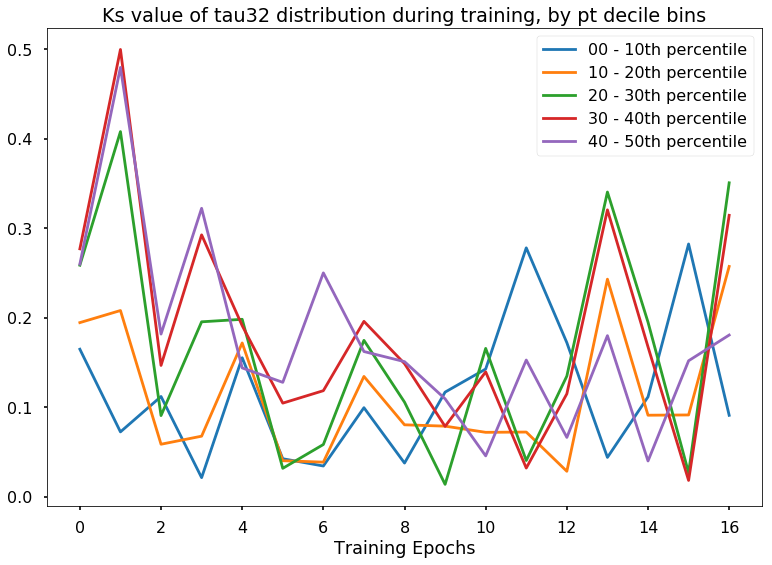

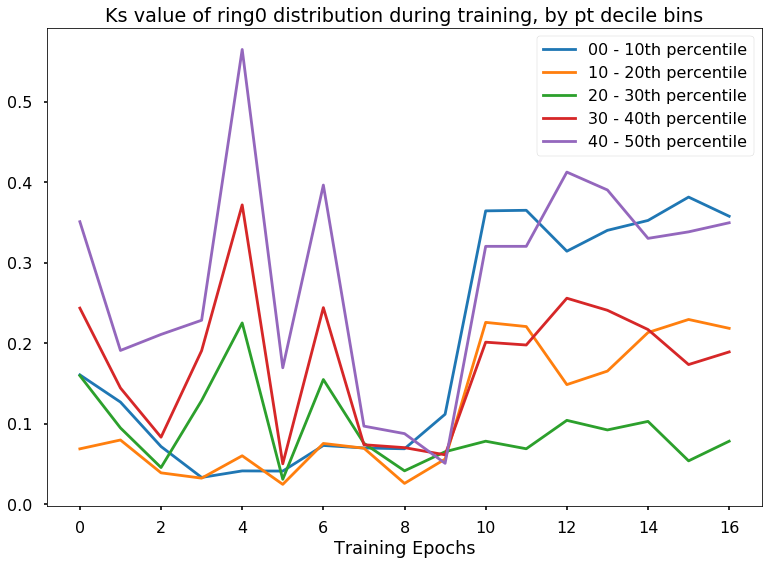

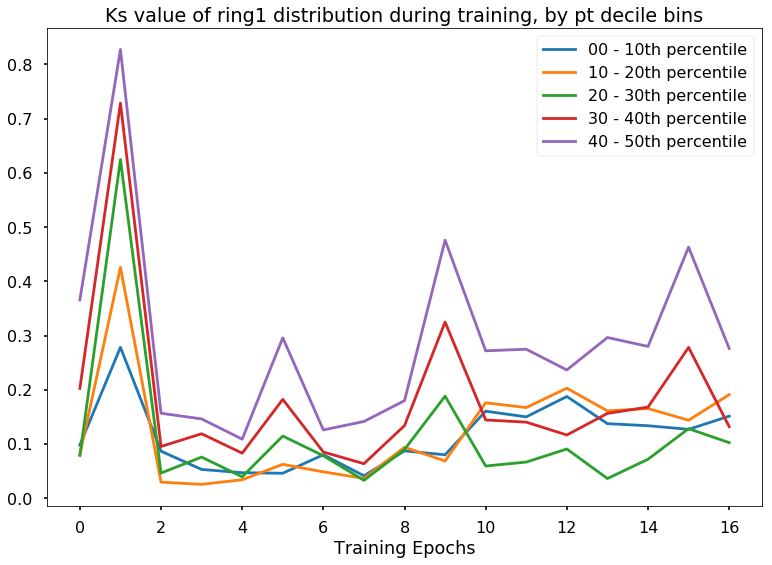

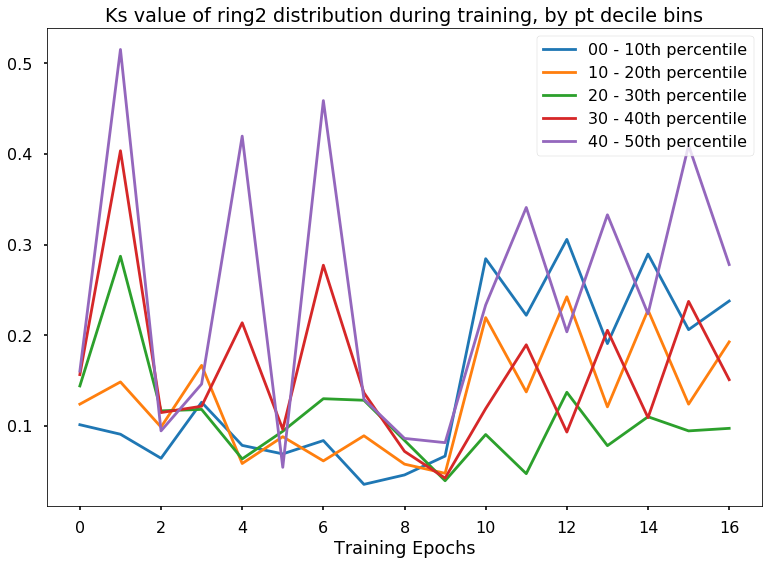

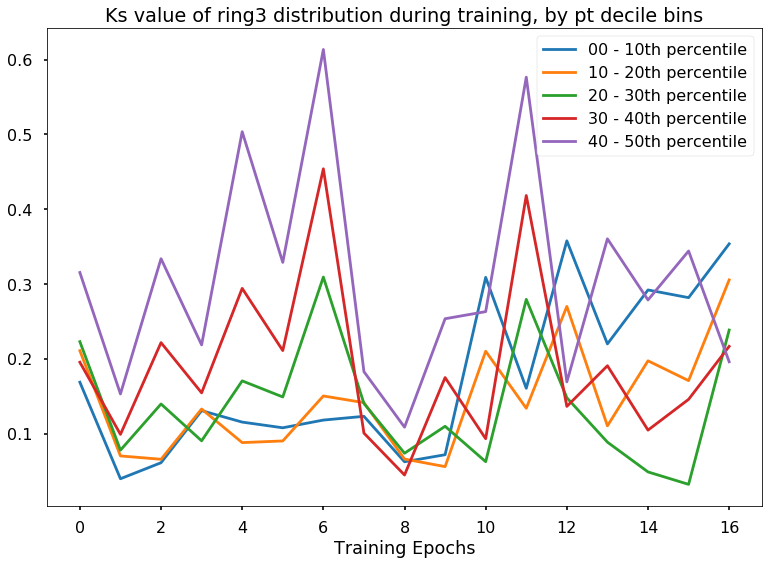

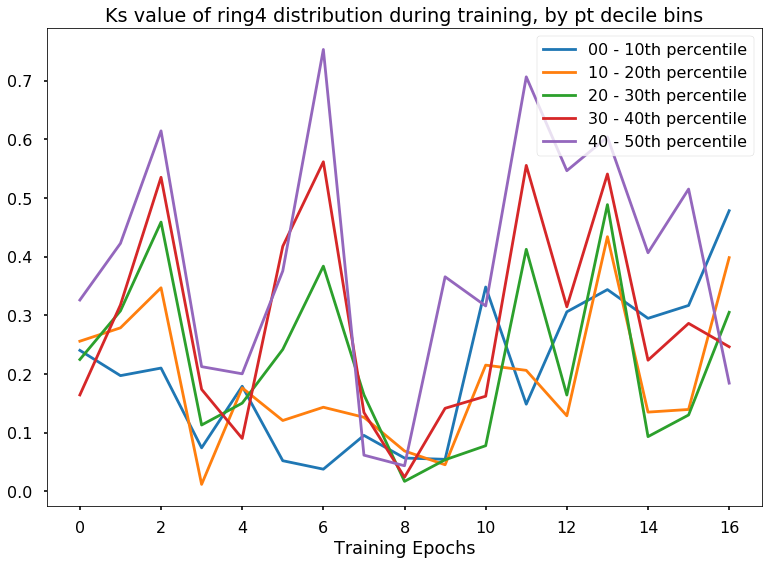

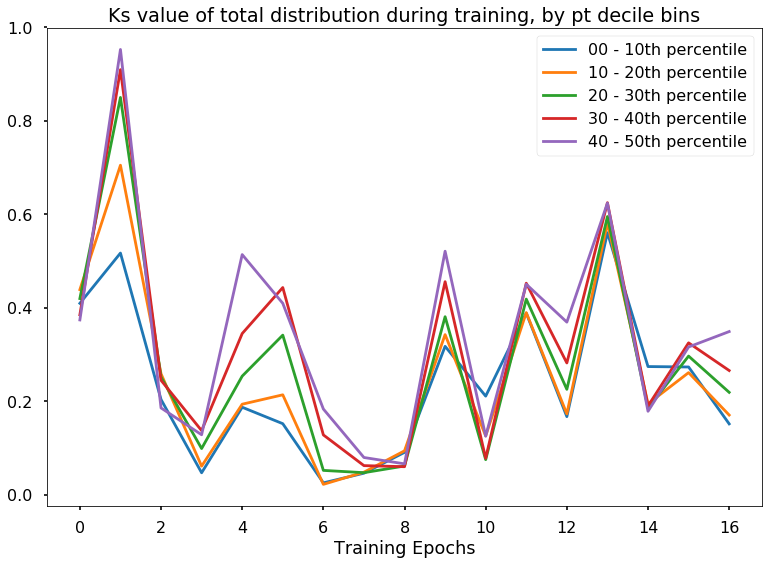

In [7]:
for v in ['ptD','maja','mina','tau1','tau2','tau3','tau21','tau32',
          'ring0', 'ring1', 'ring2', 'ring3', 'ring4', 'total']: 
    plot_ks(v)

In [8]:
dx5 = np.percentile(pt,np.linspace(0,100,6))   # pt values

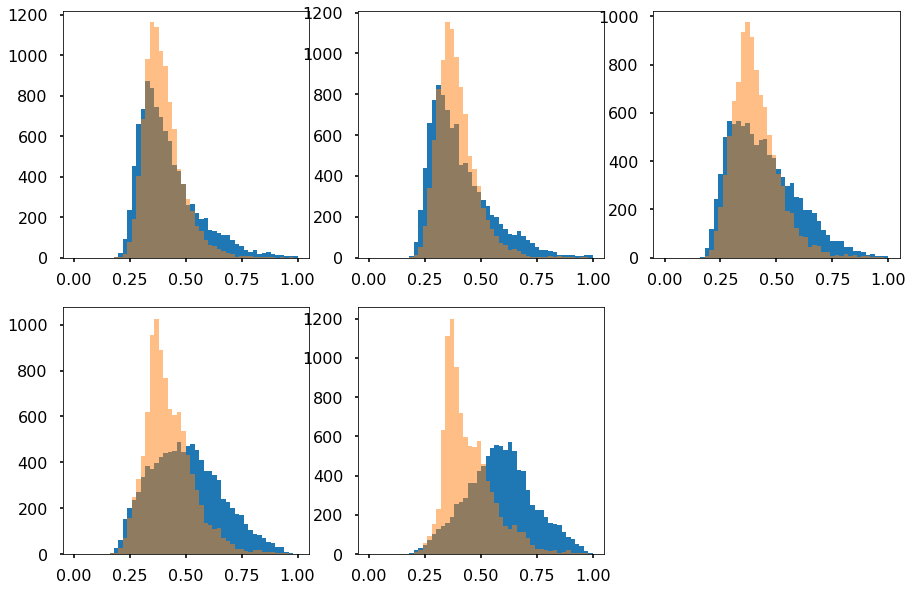

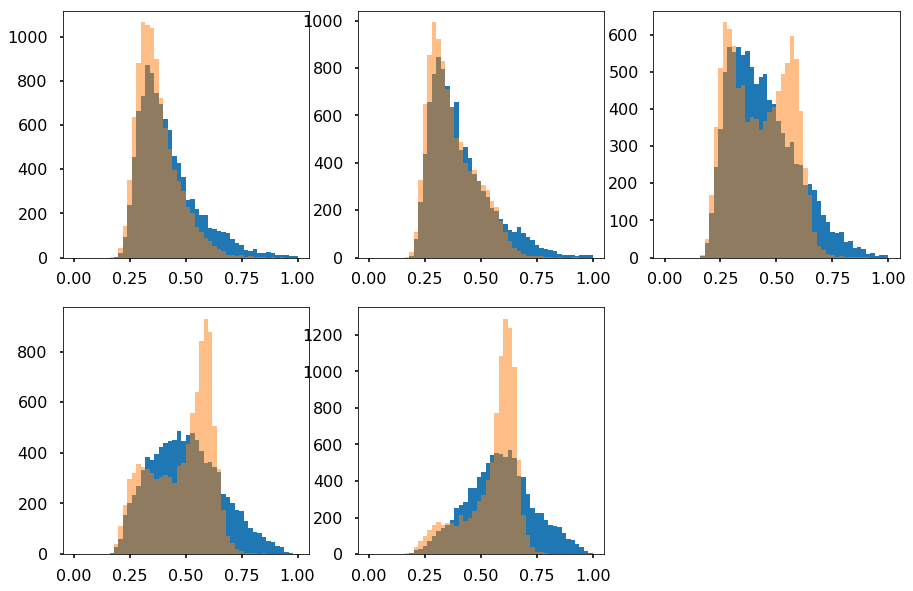

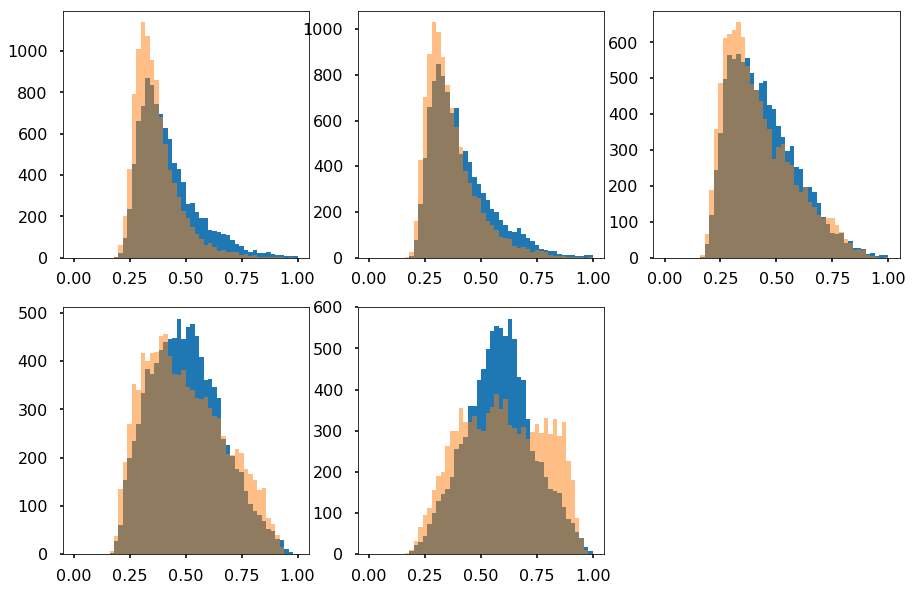

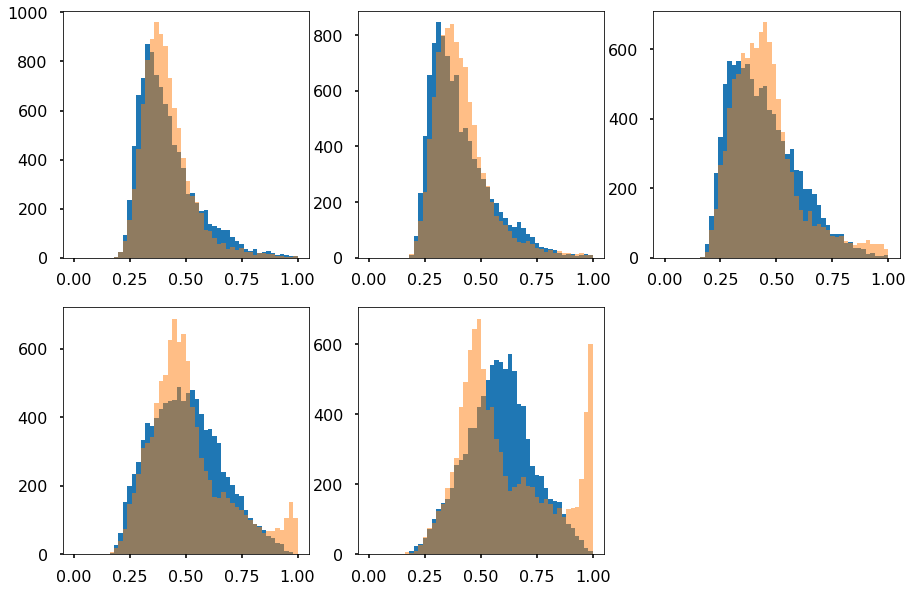

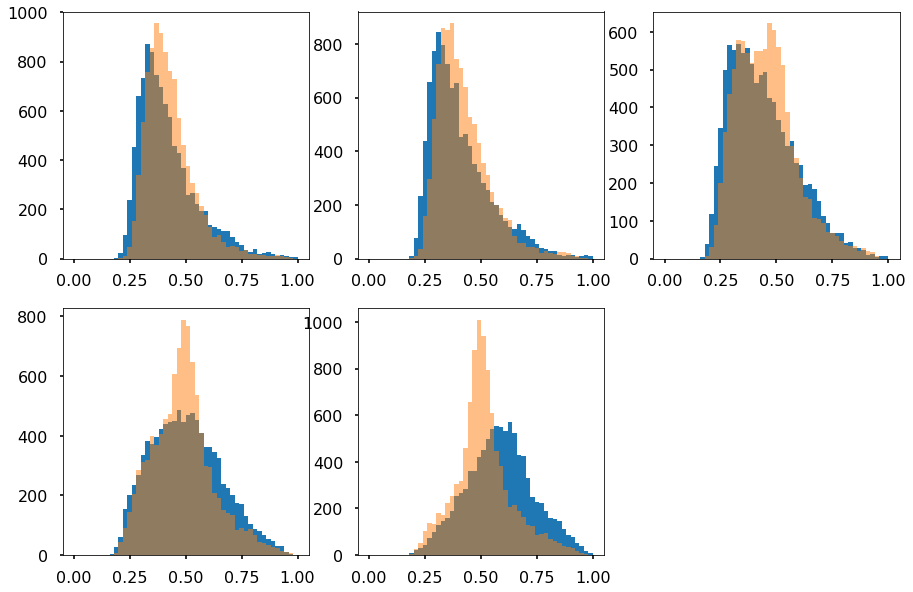

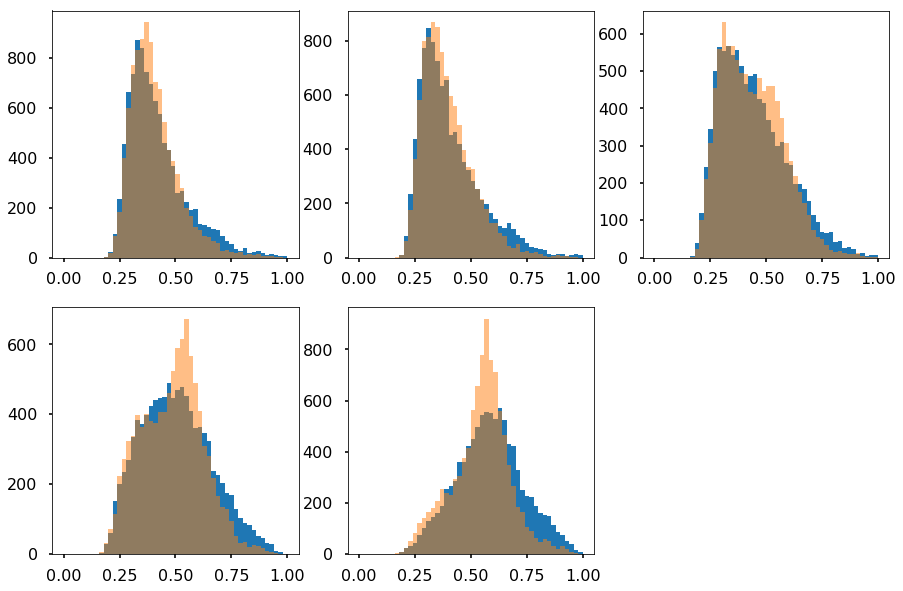

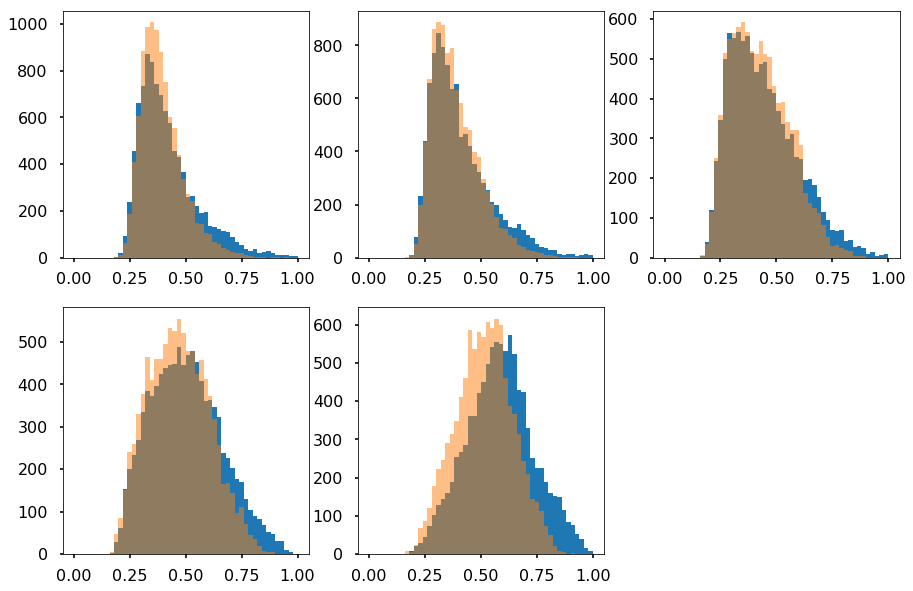

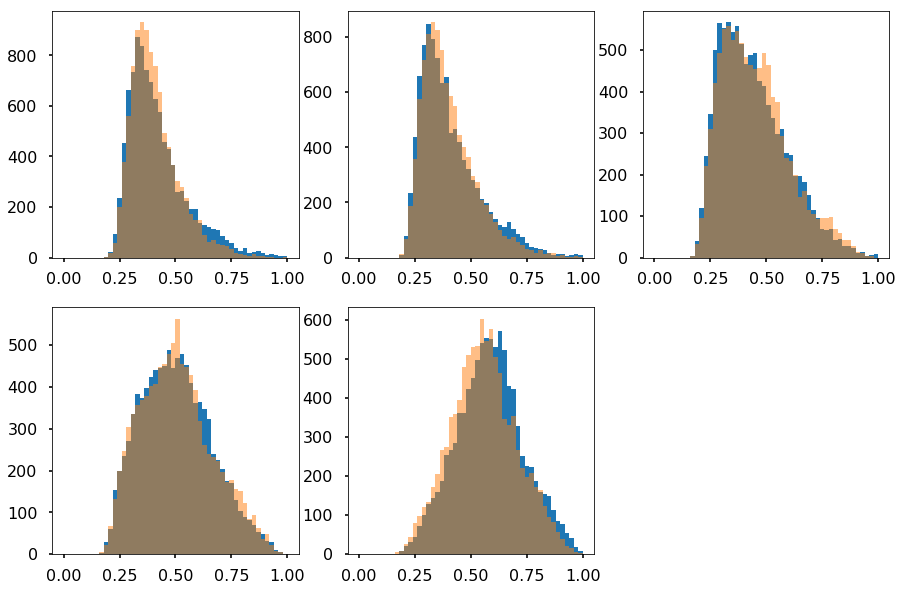

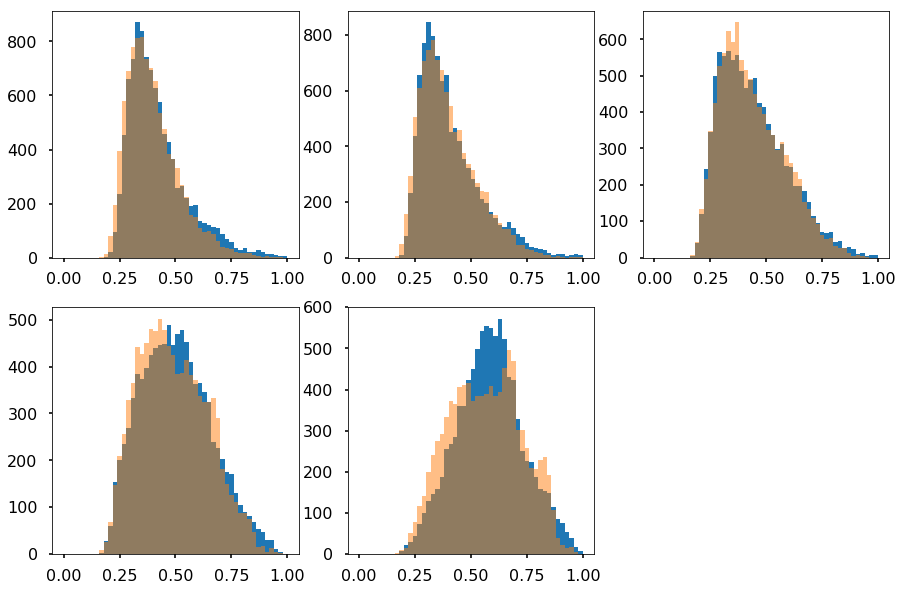

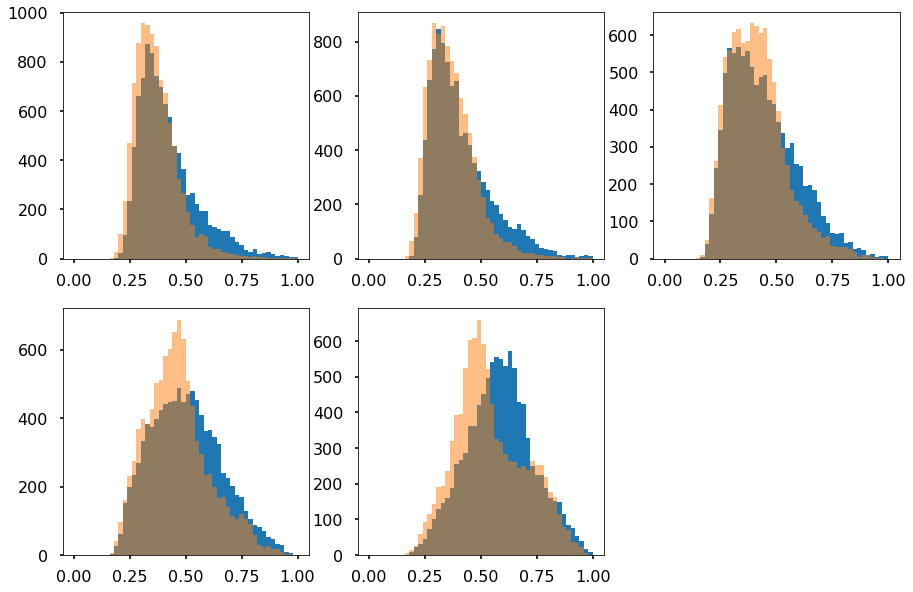

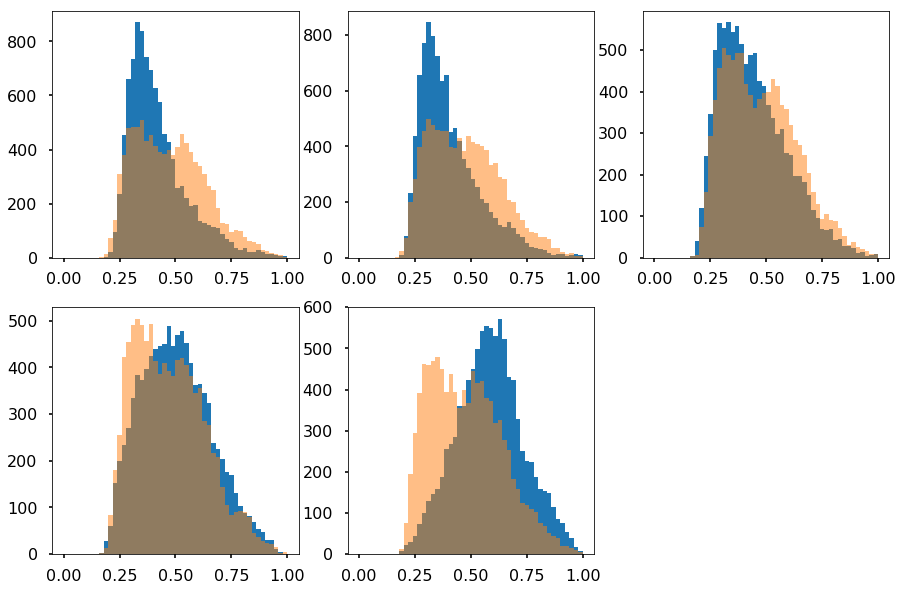

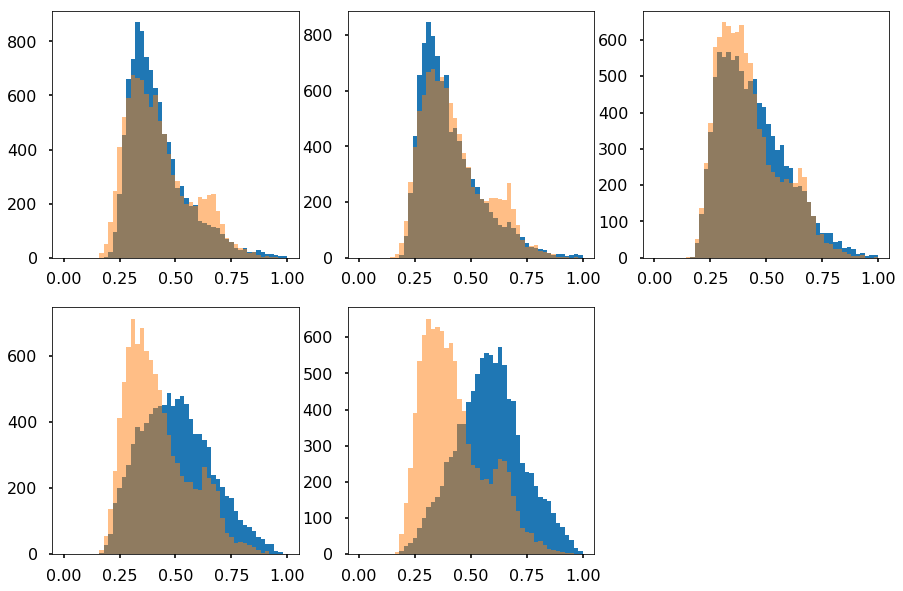

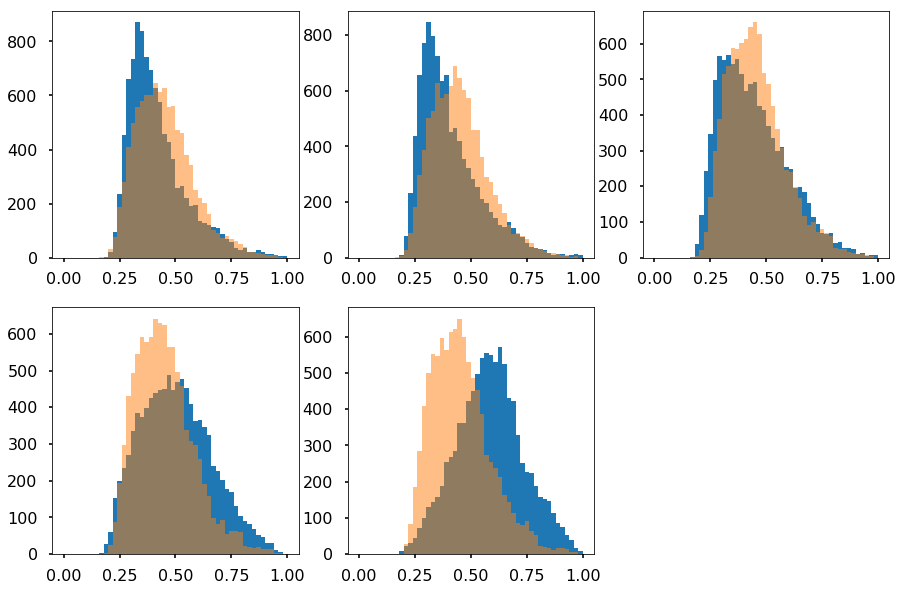

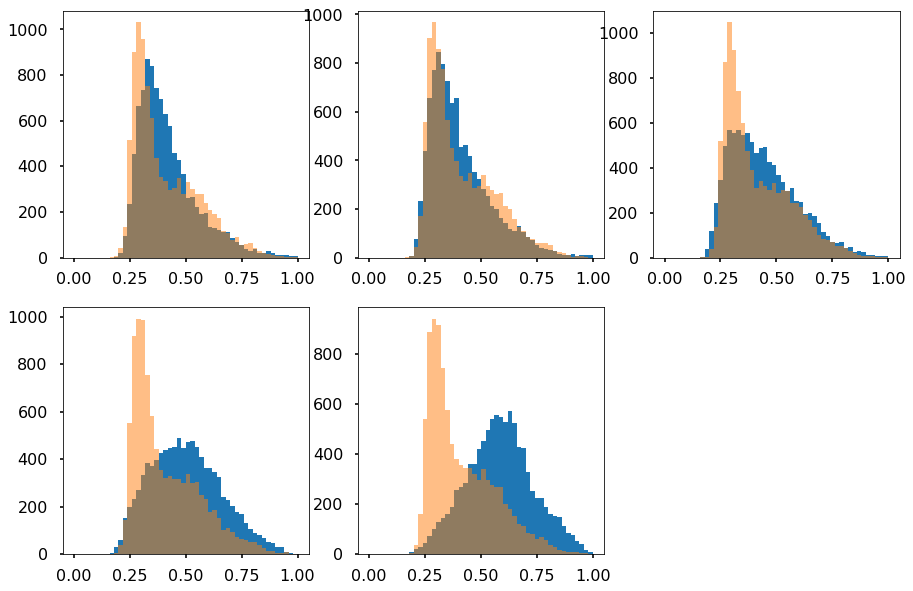

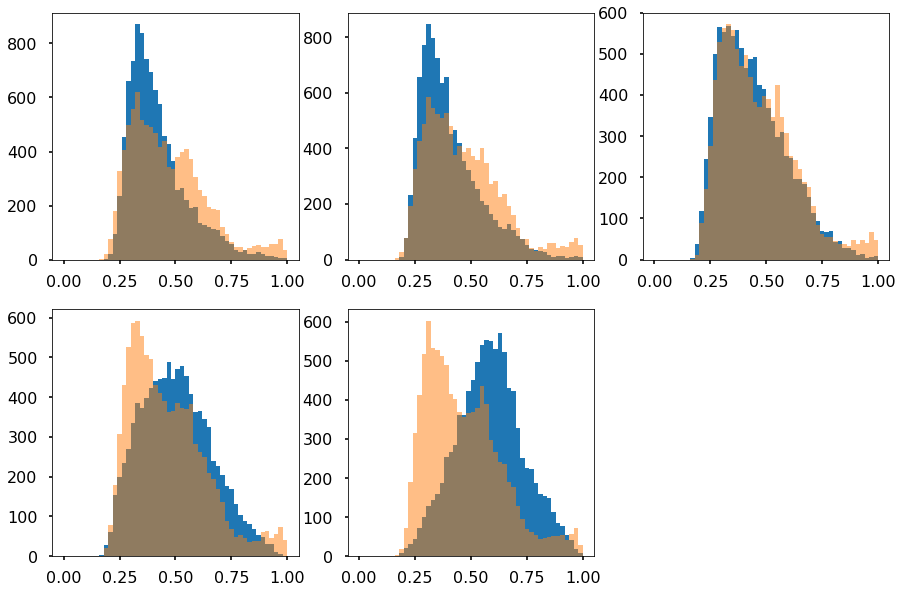

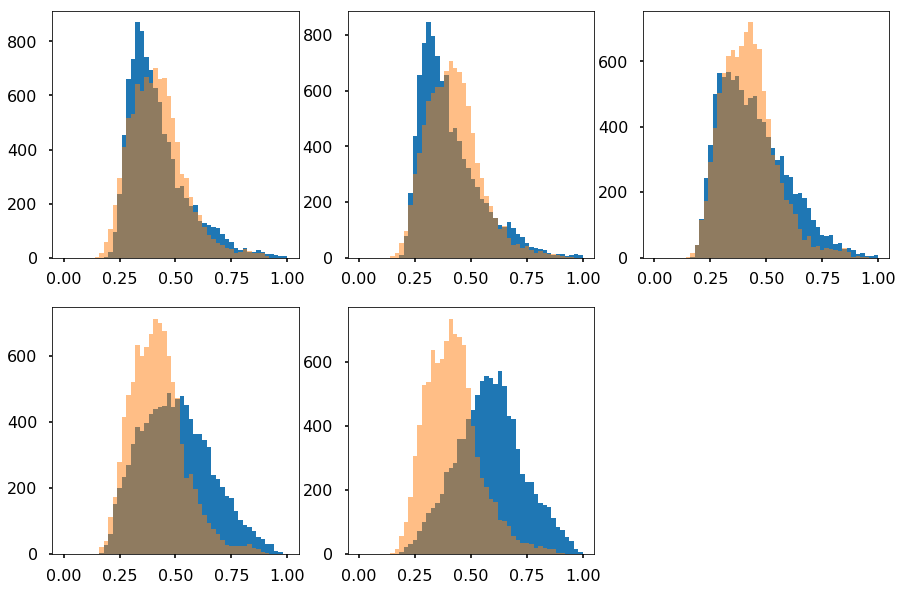

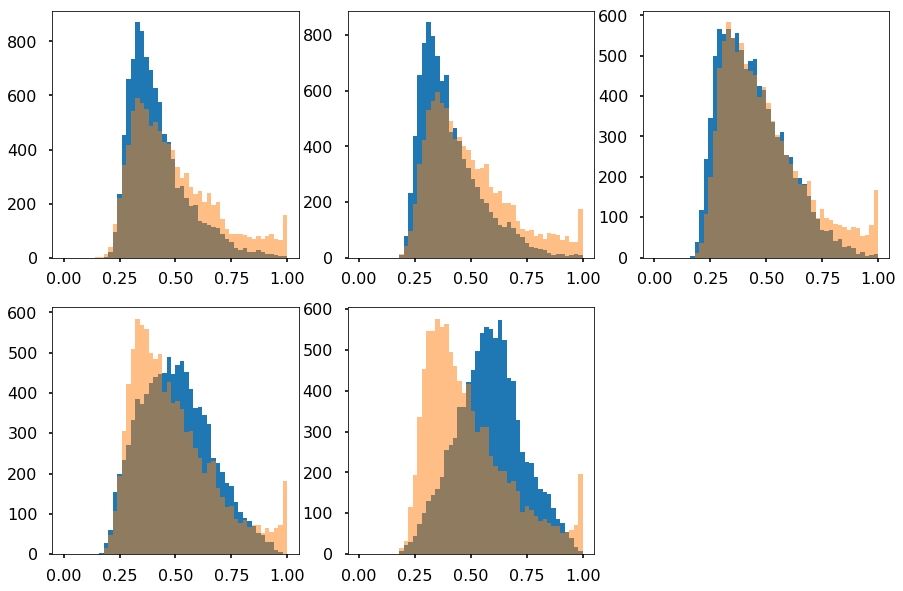

In [9]:
for x in lx:
    plt.figure(figsize=(15,10))
    for i in np.arange(1,len(dx5)): #percentile loop
        plt.subplot(2,3,i)
        upper, lower = dx5[i], dx5[i-1]
        ptD_r_ring = df0['reco_ptD'][(pt<upper)&(pt>=lower)]
        plt.hist(ptD_r_ring,bins=50,range=[0,1])
        plt.hist(x['pred_ptD'][(pt>=lower)&(pt<upper)],bins=50,range=[0,1],alpha=0.5)
    plt.show()

In [10]:
np.linspace(0,100,11)

array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
         90.,  100.])

In [11]:
def ks_percentile_sum(var,epoch):    # For given variable and epoch, return sum of ks values at different percentiles
    ks_values = []
    for i in np.arange(1,len(dx5)):  #percentile loop
        upper, lower = dx5[i], dx5[i-1]
        x = lx[epoch]
        var_pred = x['pred_'+var][(pt>=lower)&(pt<upper)]
        var_reco = x['reco_'+var][(pt>=lower)&(pt<upper)]
        ks_values += [stats.ks_2samp(var_pred,var_reco)[0]]
    return sum(ks_values)

In [12]:
ks_percentile_sum('ptD',8)

0.23730891089108921